In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Salary Data.csv')

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [8]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [9]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [20]:
df[df.isnull().any(axis=1) == True]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.loc[172]

Age                    NaN
Gender                 NaN
Education Level        NaN
Job Title              NaN
Years of Experience    NaN
Salary                 NaN
Name: 172, dtype: object

In [23]:
df = df.drop(172)
# inplace=True kullanmazsın, işlemi yapıp çıkan yeni tabloyu df'nin üstüne yazarsın.

In [24]:
df = df.drop(260)
# inplace=True kullanmazsın, işlemi yapıp çıkan yeni tabloyu df'nin üstüne yazarsın.

In [25]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [27]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [28]:
df["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [30]:
df["Job Title"].str.contains("Senior")

0      False
1      False
2       True
3      False
4      False
       ...  
370     True
371    False
372    False
373     True
374     True
Name: Job Title, Length: 373, dtype: bool

In [32]:
def title_level(title):

    if "Junior" in title:
        return "Junior"

    elif "Senior" in title or "Director" in title:
        return "Senior"

    else:
        return "Mid Level"

In [34]:
df["Seniority"] = df["Job Title"].apply(title_level)

In [36]:
df["Seniority"].value_counts()

Seniority
Senior       193
Mid Level     90
Junior        90
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [38]:
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

In [39]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Seniority,Gender_Male
0,32.0,Bachelor's,Software Engineer,5.0,90000.0,Mid Level,True
1,28.0,Master's,Data Analyst,3.0,65000.0,Mid Level,False
2,45.0,PhD,Senior Manager,15.0,150000.0,Senior,True
3,36.0,Bachelor's,Sales Associate,7.0,60000.0,Mid Level,False
4,52.0,Master's,Director,20.0,200000.0,Senior,True


In [40]:
df["Education Level"] = df["Education Level"].map({"Bachelor's": 1, "Master's": 2, "PhD": 3})

In [41]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Seniority,Gender_Male
0,32.0,1,Software Engineer,5.0,90000.0,Mid Level,True
1,28.0,2,Data Analyst,3.0,65000.0,Mid Level,False
2,45.0,3,Senior Manager,15.0,150000.0,Senior,True
3,36.0,1,Sales Associate,7.0,60000.0,Mid Level,False
4,52.0,2,Director,20.0,200000.0,Senior,True


In [45]:
df.corr(numeric_only=True)

,Age,Education Level,Years of Experience,Salary,Gender_Male
Age,1.000000,0.562693,0.979128,0.922335,-0.020324
Education Level,0.562693,1.000000,0.590863,0.670371,-0.044717
Years of Experience,0.979128,0.590863,1.000000,0.930338,0.002884
Salary,0.922335,0.670371,0.930338,1.000000,0.071106
Gender_Male,-0.020324,-0.044717,0.002884,0.071106,1.000000


<Axes: >

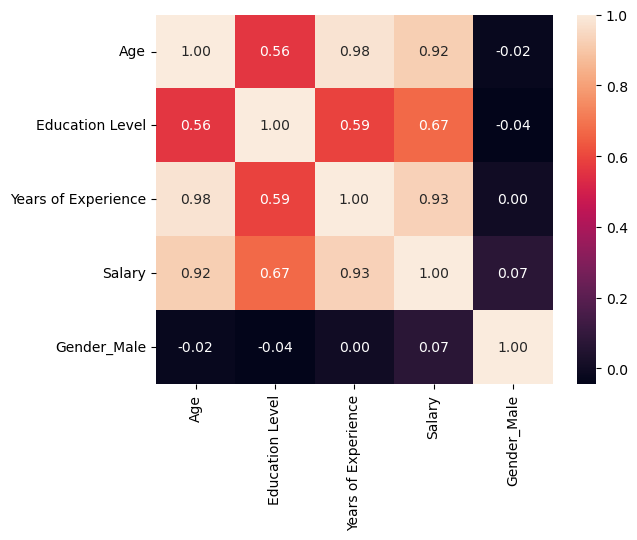

In [46]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f")

<Axes: xlabel='Years of Experience', ylabel='Salary'>

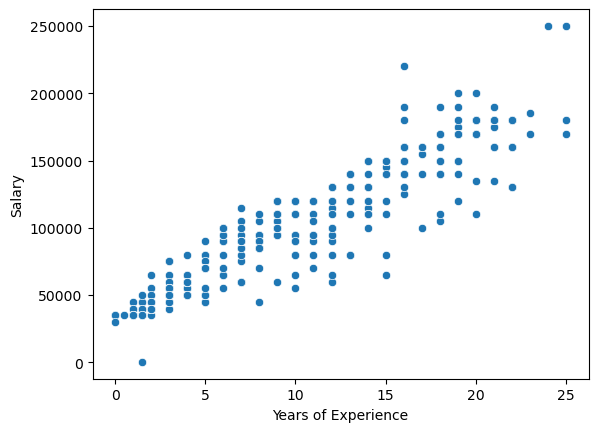

In [47]:
sns.scatterplot(x="Years of Experience", y="Salary",data=df)


In [48]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Seniority,Gender_Male
0,32.0,1,Software Engineer,5.0,90000.0,Mid Level,True
1,28.0,2,Data Analyst,3.0,65000.0,Mid Level,False
2,45.0,3,Senior Manager,15.0,150000.0,Senior,True
3,36.0,1,Sales Associate,7.0,60000.0,Mid Level,False
4,52.0,2,Director,20.0,200000.0,Senior,True


In [49]:
#X=df[["Age","Education Level","Years of Experience","Gender_Male"]]
#y=df[["Salary"]]

In [51]:
 #df["Seniority"] = df["Seniority"].map({"Junior": 1, "Mid Level": 2, "Senior": 3})

In [52]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Seniority,Gender_Male
0,32.0,1,Software Engineer,5.0,90000.0,NaN,True
1,28.0,2,Data Analyst,3.0,65000.0,NaN,False
2,45.0,3,Senior Manager,15.0,150000.0,NaN,True
3,36.0,1,Sales Associate,7.0,60000.0,NaN,False
4,52.0,2,Director,20.0,200000.0,NaN,True


In [53]:
df["Seniority"] = df["Job Title"].apply(title_level)

In [54]:
df["Seniority"].value_counts()

Seniority
Senior       193
Mid Level     90
Junior        90
Name: count, dtype: int64

In [55]:
#df["Seniority"] = df["Seniority"].map({"Junior": 1, "Mid Level": 2, "Senior": 3})

In [56]:
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Seniority,Gender_Male
0,32.0,1,Software Engineer,5.0,90000.0,2,True
1,28.0,2,Data Analyst,3.0,65000.0,2,False
2,45.0,3,Senior Manager,15.0,150000.0,3,True
3,36.0,1,Sales Associate,7.0,60000.0,2,False
4,52.0,2,Director,20.0,200000.0,3,True


In [57]:
X=df[["Age","Education Level","Years of Experience","Seniority","Gender_Male"]]
y=df[["Salary"]]

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=15)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [65]:
linear.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
y_pred = linear.predict(X_test)

In [71]:
#y_pred

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mse: ",mse)
print("mae: ",mae)
print("r2_score ",score)

mse:  335505063.2908201
mae:  12300.627689057696
r2_score  0.8771210048656188


In [78]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Ridge")
print("mse: ",mse)
print("mae: ",mae)
print("r2_score ",score)

Ridge
mse:  336082966.50052416
mae:  12304.001219387179
r2_score  0.8769093473573927


In [76]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mse: ",mse)
print("mae: ",mae)
print("r2_score ",score)

mse:  335493016.160798
mae:  12300.716777046
r2_score  0.8771254171365301


In [77]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
elastic = ElasticNet()
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mse: ",mse)
print("mae: ",mae)
print("r2_score ",score)

mse:  444506744.88805735
mae:  14643.066420352525
r2_score  0.8371990526564619


In [79]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lassocv = LassoCV(cv=5)
lassocv.fit(X_train,y_train)
y_pred = lassocv.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mse: ",mse)
print("mae: ",mae)
print("r2_score ",score)

mse:  336151663.70194894
mae:  12294.949615601934
r2_score  0.876884186952966


C:\Users\Mehmet\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train,y_train)
y_pred = ridgecv.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mse: ",mse)
print("mae: ",mae)
print("r2_score ",score)

mse:  341547693.49483496
mae:  12326.653034088511
r2_score  0.8749078867679214


In [81]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
elasticCV = ElasticNetCV(cv=5)
elasticCV.fit(X_train,y_train)
y_pred = elasticCV.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mse: ",mse)
print("mae: ",mae)
print("r2_score ",score)

mse:  2461547209.645184
mae:  42317.75715956842
r2_score  0.09845638503865672


C:\Users\Mehmet\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Farklı alpha ve l1_ratio seçenekleri sunuyoruz
# alpha küçüldükçe ceza azalır, model esner.
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1]
l1_ratios = [0.1, 0.5, 0.9]

# 2. ElasticNetCV kullanarak modeli tanımlıyoruz
# cv=5: Veriyi 5 farklı parçaya bölüp çapraz doğrulama yaparak en iyi alpha'yı bulur.
elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5)

# 3. Modeli eğitiyoruz
elastic_cv.fit(X_train, y_train)

# 4. Tahminleri alıyoruz
y_pred = elastic_cv.predict(X_test)

# 5. Metrikleri hesaplıyoruz
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

# 6. Sonuçları ve seçilen en iyi parametreleri yazdırıyoruz
print(f"Seçilen En İyi Alpha: {elastic_cv.alpha_}")
print(f"Seçilen En İyi L1 Oranı: {elastic_cv.l1_ratio_}")
print("-" * 30)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2 Score: {score}")

Seçilen En İyi Alpha: 0.5
Seçilen En İyi L1 Oranı: 0.9
------------------------------
MSE: 344627284.6676998
MAE: 12354.844275525491
R2 Score: 0.8737799840619693


C:\Users\Mehmet\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
katsayilar = pd.DataFrame({"Ozellik": X.columns, "Katsayi": lasso.coef_})
print(katsayilar)

               Ozellik       Katsayi
0                  Age  16435.504938
1      Education Level   8290.897684
2  Years of Experience  17885.682303
3            Seniority   7866.987898
4          Gender_Male   3865.256183


In [85]:
sirali_katsayilar = katsayilar.sort_values(by="Katsayi", ascending=False)

print("Maaşı Etkileyen Faktörlerin Sıralaması (En Düşükten En Yükseğe):")
print("-" * 60)
print(sirali_katsayilar)

Maaşı Etkileyen Faktörlerin Sıralaması (En Düşükten En Yükseğe):
------------------------------------------------------------
               Ozellik       Katsayi
2  Years of Experience  17885.682303
0                  Age  16435.504938
1      Education Level   8290.897684
3            Seniority   7866.987898
4          Gender_Male   3865.256183
